In [1]:
import pandas as pd
import numpy as np

In [2]:
df_normal = pd.read_csv('Final_train.csv')
df_normal.drop('Unnamed: 0',axis = 1, inplace = True)
df_normal.head()

0         1         2         3         4         5         6  \
0 -0.11025  2.219302  0.781420  0.751116 -0.007737 -0.004919 -0.014089   
1 -0.11025 -0.124707  1.087297 -0.736227 -0.007762 -0.004919 -0.014089   
2 -0.11025 -0.124707 -0.442088  0.751116 -0.007723 -0.002891 -0.014089   
3 -0.11025 -0.124707 -0.442088  0.751116 -0.007728 -0.004814 -0.014089   
4 -0.11025 -0.124707  1.087297 -2.223571 -0.007762 -0.004919 -0.014089   

          7         8         9  ...        32        33        34        35  \
0 -0.089487 -0.007736 -0.095076  ... -1.035693 -1.161035  2.736839  2.367729   
1 -0.089487 -0.007736 -0.095076  ... -0.809862 -0.938292 -0.174419 -0.480194   
2 -0.089487 -0.007736 -0.095076  ...  1.258746  1.066393 -0.439079 -0.383106   
3 -0.089487 -0.007736 -0.095076  ...  1.258746  1.066393 -0.439079 -0.480194   
4 -0.089487 -0.007736 -0.095076  ... -0.873095 -1.005115 -0.068555 -0.480194   

         36        37        38        39        40        41  
0 -0.289105 -0.639535 -0.624874 -0.387635 -0.376389 -1.965547  
1 -0.289105  1.608750  1.618946 -0.387635 -0.376389 -0.219968  
2  0.066249 -0.572087 -0.602436 -0.387635 -0.345086  0.652822  
3 -0.289105 -0.639535 -0.624874 -0.387635 -0.376389  0.652822  
4 -0.289105 -0.639535 -0.624874  2.874397  2.753901  0.652822  

[5 rows x 42 columns]

In [3]:
### Importing the Y values

In [4]:
true_y = pd.read_csv('True_y.csv')
true_y.head()

Unnamed: 0  attack
0           0       0
1           1       2
2           2       0
3           3       0
4           4       2

In [5]:
y_train = true_y['attack']

## ON NORMAL DATASET:
KMeans: 58%, 0.39
DBSCAN: 5%  ,-0.08
BIRCH:  54%, 0.89

## Applying KMeans to dataset

In [6]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_normal)
    sse.append(km.inertia_)

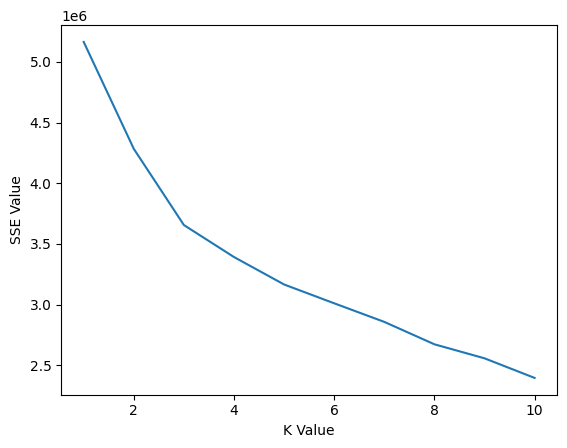

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), sse)
plt.xlabel("K Value")
plt.ylabel("SSE Value")
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3)
y_pred_kmeans = kmeans.fit_predict(df_normal)
# df_normal['Preds_kmeans'] = y_pred_kmeans
df_normal.head()

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0         1         2         3         4         5         6  \
0 -0.11025  2.219302  0.781420  0.751116 -0.007737 -0.004919 -0.014089   
1 -0.11025 -0.124707  1.087297 -0.736227 -0.007762 -0.004919 -0.014089   
2 -0.11025 -0.124707 -0.442088  0.751116 -0.007723 -0.002891 -0.014089   
3 -0.11025 -0.124707 -0.442088  0.751116 -0.007728 -0.004814 -0.014089   
4 -0.11025 -0.124707  1.087297 -2.223571 -0.007762 -0.004919 -0.014089   

          7         8         9  ...        32        33        34        35  \
0 -0.089487 -0.007736 -0.095076  ... -1.035693 -1.161035  2.736839  2.367729   
1 -0.089487 -0.007736 -0.095076  ... -0.809862 -0.938292 -0.174419 -0.480194   
2 -0.089487 -0.007736 -0.095076  ...  1.258746  1.066393 -0.439079 -0.383106   
3 -0.089487 -0.007736 -0.095076  ...  1.258746  1.066393 -0.439079 -0.480194   
4 -0.089487 -0.007736 -0.095076  ... -0.873095 -1.005115 -0.068555 -0.480194   

         36        37        38        39        40        41  
0 -0.289105 -0.639535 -0.624874 -0.387635 -0.376389 -1.965547  
1 -0.289105  1.608750  1.618946 -0.387635 -0.376389 -0.219968  
2  0.066249 -0.572087 -0.602436 -0.387635 -0.345086  0.652822  
3 -0.289105 -0.639535 -0.624874 -0.387635 -0.376389  0.652822  
4 -0.289105 -0.639535 -0.624874  2.874397  2.753901  0.652822  

[5 rows x 42 columns]

In [9]:
# df_normal.drop('Preds_kmeans', axis = 1, inplace =True)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_kmeans))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     68337
           1       0.35      0.46      0.40     11656
           2       0.98      0.75      0.85     45979

    accuracy                           0.83    125972
   macro avg       0.73      0.72      0.72    125972
weighted avg       0.86      0.83      0.84    125972



In [11]:
# for n_clusters in range_n_clusters:

#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(df_normal)

#     silhouette_avg = silhouette_score(df_normal, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)


In [13]:
from sklearn.metrics import silhouette_score
silhouette_avg_kmeans = silhouette_score(df_normal, y_pred_kmeans)
silhouette_avg_kmeans

0.3977921291575156

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
y_pred_db = dbscan.fit_predict(df_normal)

In [ ]:
np.unique(y_pred_db)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_db))

In [ ]:
silhouette_avg_db = silhouette_score(df_normal, y_pred_db)
silhouette_avg_db

In [ ]:
from sklearn.cluster import
AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
y_pred_aggl = agg.fit_predict(df_normal.head(10000))


In [ ]:
silhouette_avg_agg = silhouette_score(df_normal.head(10000), y_pred_aggl)
silhouette_avg_agg

## Birch

In [17]:
from sklearn.cluster import Birch
birch = Birch()

In [18]:
y_pred_birch = birch.fit_predict(df_normal)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_birch))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70     68337
           1       0.00      0.00      0.00     11656
           2       0.00      0.00      0.00     45979

    accuracy                           0.54    125972
   macro avg       0.18      0.33      0.23    125972
weighted avg       0.29      0.54      0.38    125972



In [10]:
silhouette_avg_birch = silhouette_score(df_normal, y_pred_birch)
silhouette_avg_birch

0.898353099775233

### Model on PCA Data
KMeans: 58%, 0.81
DBSCAN: 54%, 0.26
BIRCH: 85%, 0.77

In [22]:
df_pca = pd.read_csv('PCA_Dataset')
df_pca.drop('Unnamed: 0', axis = 1, inplace = True)
df_pca.head()

PC1       PC2
0  0.648796  0.882037
1  3.624793 -2.006807
2 -2.651443 -0.668396
3 -2.441028 -0.590606
4  2.726314  5.372859

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(df_pca)
fig = plt.figure(figsize =(10, 7))
plt.show()

<Figure size 1000x700 with 0 Axes>

In [27]:
pca_preds = df_pca
pca_preds

PC1       PC2
0       0.648796  0.882037
1       3.624793 -2.006807
2      -2.651443 -0.668396
3      -2.441028 -0.590606
4       2.726314  5.372859
...          ...       ...
125967  3.656211 -2.041359
125968 -1.620171 -0.423819
125969 -0.398003 -0.591329
125970  3.545525 -2.081661
125971 -1.583059 -0.351233

[125972 rows x 2 columns]

## Birch

In [4]:
from sklearn.cluster import Birch
birch = Birch()

In [5]:
y_pred_pca_birch = birch.fit_predict(df_pca)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_pca_birch))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     68337
           1       0.42      0.44      0.43     11656
           2       0.96      0.75      0.84     45979

    accuracy                           0.85    125972
   macro avg       0.75      0.73      0.73    125972
weighted avg       0.86      0.85      0.85    125972



In [11]:
from sklearn.metrics import silhouette_score
silhouette_avg_pca_birch = silhouette_score(df_pca, y_pred_pca_birch)
silhouette_avg_pca_birch

0.7760477196035641

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


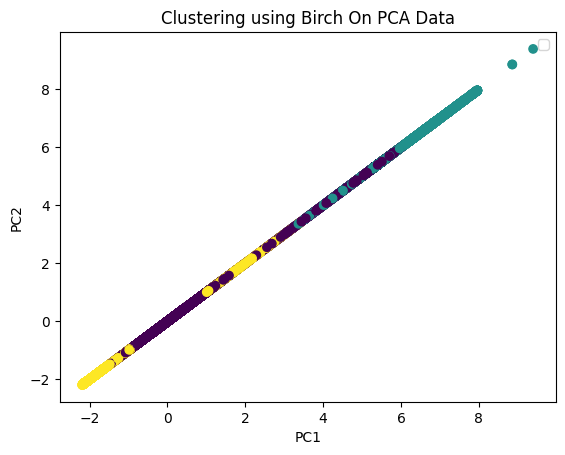

In [35]:
import matplotlib.pyplot as plt
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering using Birch On PCA Data')
plt.scatter(df_pca['PC2'], df_pca['PC2'], c = y_pred_pca_birch)

## Kmeans

In [28]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_normal)
    sse.append(km.inertia_)

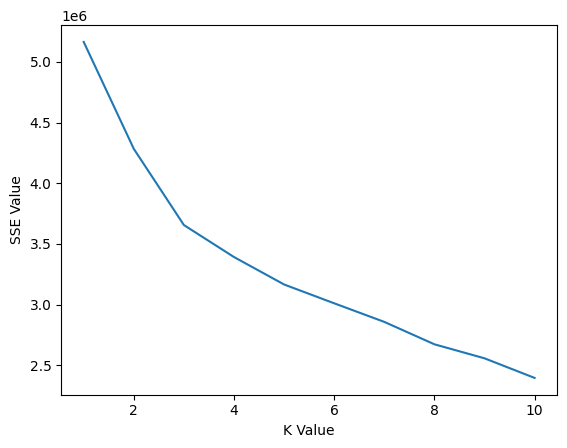

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), sse)
plt.xlabel("K Value")
plt.ylabel("SSE Value")
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3)
y_pred_pca_kmeans = kmeans.fit_predict(df_pca)

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_pca_kmeans))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     68337
           1       0.01      0.03      0.02     11656
           2       0.45      0.15      0.23     45979

    accuracy                           0.58    125972
   macro avg       0.44      0.38      0.38    125972
weighted avg       0.63      0.58      0.57    125972



In [41]:
silhouette_avg_pca_kmeans = silhouette_score(df_pca, y_pred_pca_kmeans)
silhouette_avg_pca_kmeans

0.8141428933504157

In [32]:
pca_preds['Preds_Kmeans'] = y_pred_pca_kmeans
pca_preds.head()

PC1       PC2  Preds_Kmeans
0  0.648796  0.882037             1
1  3.624793 -2.006807             0
2 -2.651443 -0.668396             1
3 -2.441028 -0.590606             1
4  2.726314  5.372859             2

In [33]:
df1_pca_kmeans = pca_preds[pca_preds['Preds_Kmeans'] == 0]
df2_pca_kmeans = pca_preds[pca_preds['Preds_Kmeans'] == 1]
df3_pca_kmeans = pca_preds[pca_preds['Preds_Kmeans'] == 2]

In [34]:
plt.scatter(df1_pca_kmeans['PC1'],df1_pca_kmeans['PC2'], color = 'g', label = 'cluster 1')
plt.scatter(df2_pca_kmeans['PC1'],df2_pca_kmeans['PC2'], color = 'r')
plt.scatter(df3_pca_kmeans['PC1'],df3_pca_kmeans['PC2'], color = 'y')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering using Kmeans on PCA Data')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s= 50, c = 'blue')

In [29]:
# plt.scatter(pca_preds[:,0], pca_preds[:,1],c=y_pred_pca_kmeans, cmap='Paired')


### Applying DBSCAN to PCA data

In [30]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
y_pred_pca_db = dbscan.fit_predict(df_pca)

In [49]:
np.unique(y_pred_pca_db)

array([-1,  0,  1,  2], dtype=int64)

In [51]:
print(classification_report(y_train, y_pred_pca_db))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.54      1.00      0.70     68337
           1       1.00      0.01      0.02     11656
           2       0.00      0.00      0.00     45979

    accuracy                           0.54    125972
   macro avg       0.39      0.25      0.18    125972
weighted avg       0.39      0.54      0.38    125972



C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
silhouette_avg_pca_db = silhouette_score(df_pca, y_pred_pca_db)
silhouette_avg_pca_db

0.26839890898239943

In [31]:
pca_preds['Preds_db'] = y_pred_pca_db
pca_preds.head()

PC1       PC2  Preds_Kmeans  Preds_db
0  0.648796  0.882037             0         0
1  3.624793 -2.006807             1         1
2 -2.651443 -0.668396             0         0
3 -2.441028 -0.590606             0         0
4  2.726314  5.372859             2         2

In [34]:
df1_pca_db = pca_preds[pca_preds['Preds_db'] == 0]
df2_pca_db = pca_preds[pca_preds['Preds_db'] == 1]
df3_pca_db = pca_preds[pca_preds['Preds_db'] == 2]

In [36]:
plt.scatter(df1_pca_db['PC1'],df1_pca_db['PC2'], color = 'g', label = 'cluster 1')
plt.scatter(df2_pca_db['PC1'],df2_pca_db['PC2'], color = 'r')
plt.scatter(df3_pca_db['PC1'],df3_pca_db['PC2'], color = 'y')

### Model on ICA Dataset
KMeans: 10%, 0.81

In [20]:
df_ica = pd.read_csv('ICA_Dataset')
df_ica.drop('Unnamed: 0', axis = 1, inplace = True)
df_ica.head()

IC1       IC2
0 -0.000421 -0.001201
1 -0.004105  0.001674
2  0.002463  0.001358
3  0.002273  0.001221
4 -0.001347 -0.007061

In [3]:
ica_preds = df_ica
ica_preds.head()

IC1       IC2
0 -0.000421 -0.001201
1 -0.004105  0.001674
2  0.002463  0.001358
3  0.002273  0.001221
4 -0.001347 -0.007061

### Kmeans on ICA Data

In [40]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_normal)
    sse.append(km.inertia_)

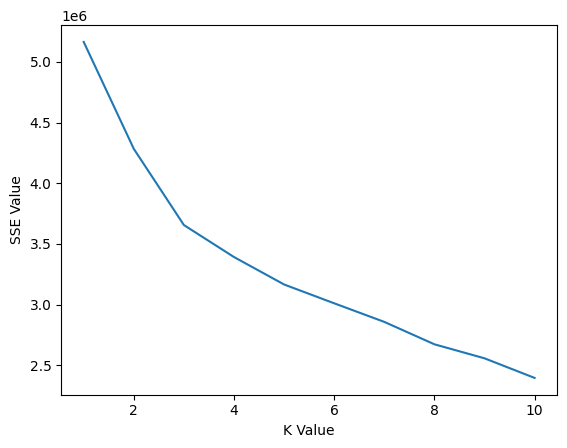

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), sse)
plt.xlabel("K Value")
plt.ylabel("SSE Value")
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3)
y_pred_ica_kmeans = kmeans.fit_predict(df_ica)
# df_normal['Preds_ica_kmeans'] = y_pred_ica_kmeans

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
print(classification_report(y_train, y_pred_ica_kmeans))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     68337
           1       0.08      0.50      0.13     11656
           2       0.45      0.15      0.23     45979

    accuracy                           0.10    125972
   macro avg       0.18      0.22      0.12    125972
weighted avg       0.17      0.10      0.10    125972



In [61]:
silhouette_avg_ica_kmeans = silhouette_score(df_pca, y_pred_ica_kmeans)
silhouette_avg_ica_kmeans

0.8141032060704835

In [44]:
ica_preds['Preds_kmeans'] = y_pred_ica_kmeans
ica_preds.head()

IC1       IC2  Preds_kmeans
0 -0.000421 -0.001201             1
1 -0.004105  0.001674             0
2  0.002463  0.001358             1
3  0.002273  0.001221             1
4 -0.001347 -0.007061             2

In [48]:
df1_ica_kmeans = ica_preds[ica_preds['Preds_kmeans'] == 0]
df2_ica_kmeans = ica_preds[ica_preds['Preds_kmeans'] == 1]
df3_ica_kmeans = ica_preds[ica_preds['Preds_kmeans'] == 2]

In [50]:
plt.scatter(df1_ica_kmeans['IC1'],df1_ica_kmeans['IC2'], color = 'g', label = 'cluster 1')
plt.scatter(df2_ica_kmeans['IC1'],df2_ica_kmeans['IC2'], color = 'r')
plt.scatter(df3_ica_kmeans['IC1'],df3_ica_kmeans['IC2'], color = 'y')

### DBSCAN On ICA dataset

In [7]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
y_pred_ica_db = dbscan.fit_predict(df_ica.head(1000))

In [2]:
# np.unique(y_pred_ica_db)

In [3]:
# print(classification_report(y_train, y_pred_ica_db))

In [4]:
# silhouette_avg_ica_db = silhouette_score(df_pca, y_pred_ica_db)
# silhouette_avg_ica_db

In [5]:
# ica_preds['Preds_db'] = y_pred_ica_db
# ica_preds.head()

In [ ]:
# df1_ica_db = ica_preds[ica_preds['Preds_db'] == 0]
# df2_ica_db = ica_preds[ica_preds['Preds_db'] == 1]
# df3_ica_db = ica_preds[ica_preds['Preds_db'] == 2]

In [ ]:
# plt.scatter(df1_ica_db['IC1'],df1_ica_db['IC2'], color = 'g', label = 'cluster 1')
# plt.scatter(df2_ica_db['IC1'],df2_ica_db['IC2'], color = 'r')
# plt.scatter(df3_ica_db['IC1'],df3_ica_db['IC2'], color = 'y')

## Birch on ICA

In [14]:
from sklearn.cluster import Birch
birch = Birch()

In [21]:
y_pred_ica_birch = birch.fit_predict(df_ica)

C:\Python\Lib\site-packages\sklearn\cluster\_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


In [24]:
# silhouette_avg_ica_birch = silhouette_score(df_ica, y_pred_ica_birch,metric = 'eucledean')
# silhouette_avg_ica_birch

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_ica_birch))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70     68337
           1       0.00      0.00      0.00     11656
           2       0.00      0.00      0.00     45979

    accuracy                           0.54    125972
   macro avg       0.18      0.33      0.23    125972
weighted avg       0.29      0.54      0.38    125972



C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
